# **Flight Price and Type Prediction using a Customized Cascaded Algorithm**

### **GPU**

In [3]:
from IPython.display import HTML, clear_output
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:gpu = 'K80'
elif 'T4' in s:gpu = 'T4'
elif 'P100' in s:gpu = 'P100'
elif 'P4' in s:gpu = 'P4'
display(HTML(f"<h1>{gpu}</h1>"))

### **Libraries**

In [1]:
import pandas as pd # Library to process the dataframe
import numpy as np # Library to handle with numpy arrays
import warnings # Library that handles all the types of warnings during execution
import matplotlib.pyplot as plt# Library that handles ploting of  the graphs
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore") # Ignore all the warnings

### **Data Preprocessing**

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df=train_df.dropna(how='any')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [4]:
train_df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [6]:
test_df=pd.read_excel('Test_set.xlsx')
test_df=test_df.dropna(how='any')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB


In [8]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [9]:
test_df["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

### **Data Visualization**

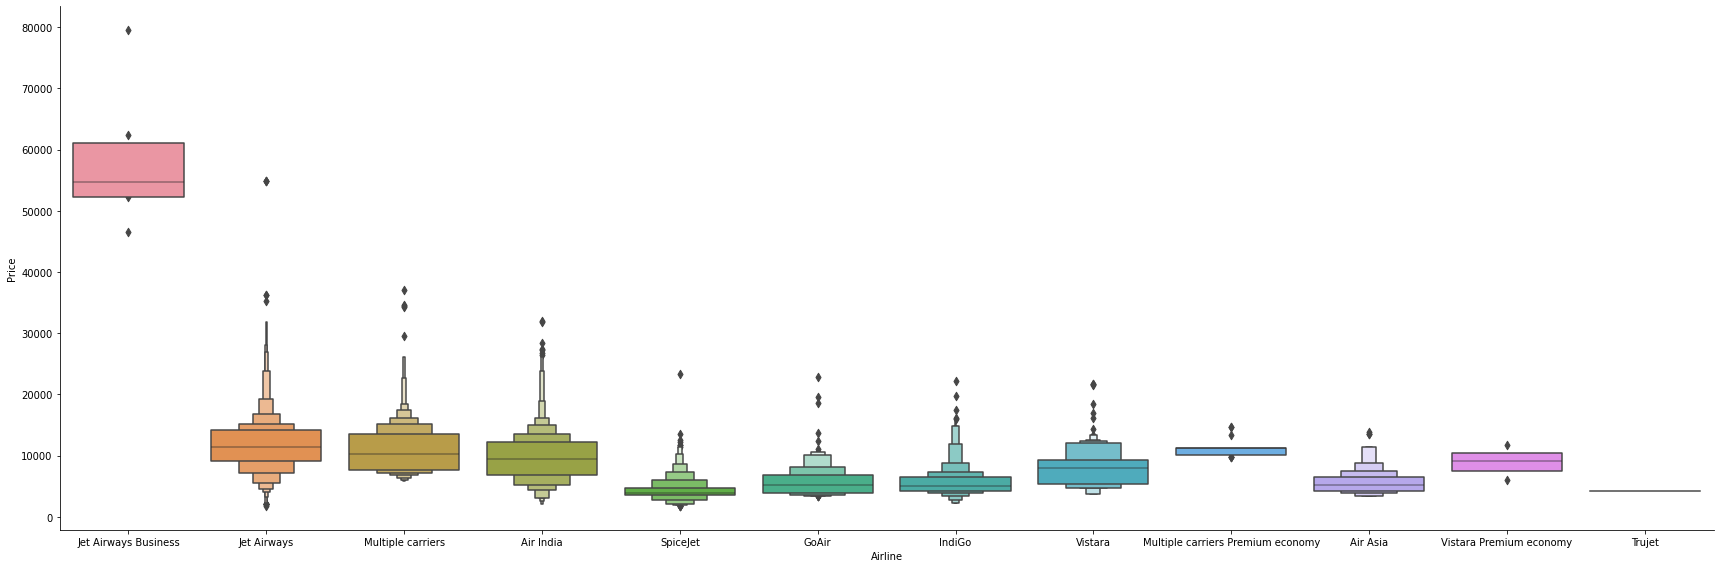

In [10]:
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

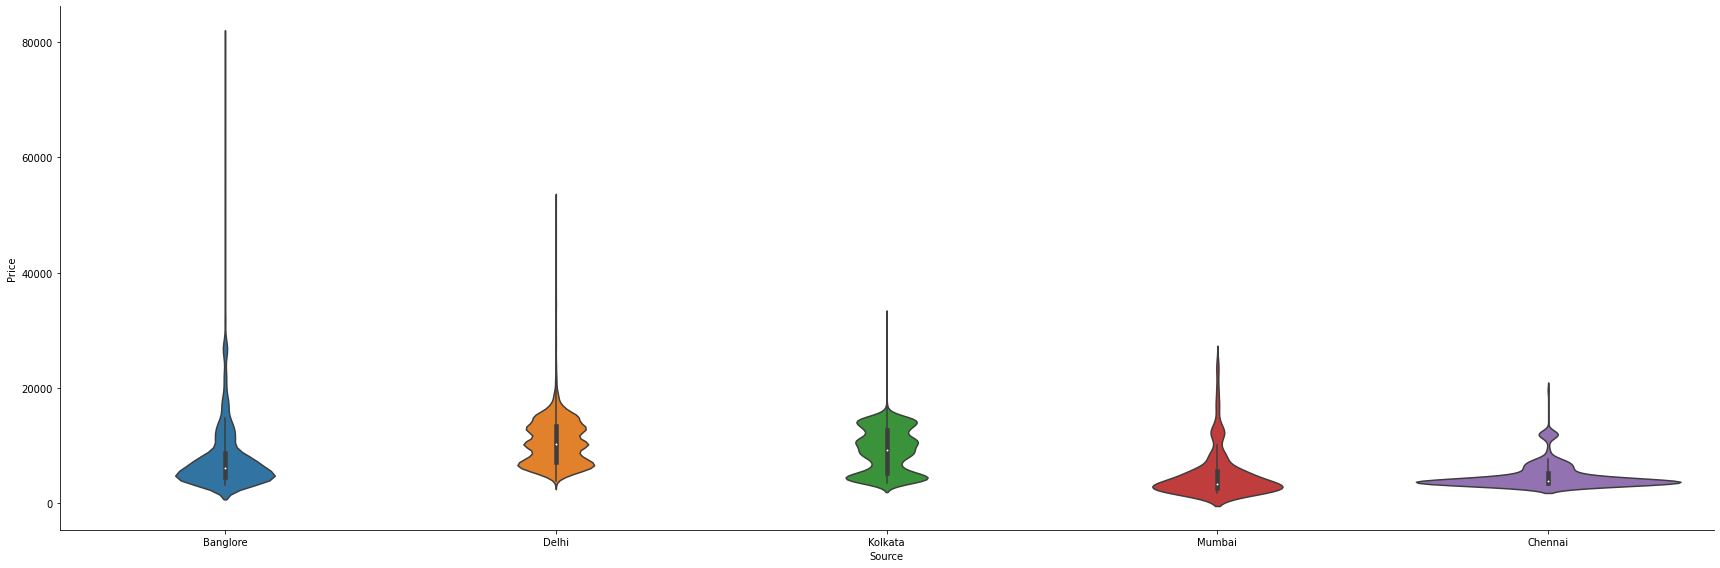

In [11]:
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="violin", height = 8, aspect = 3)
plt.show()

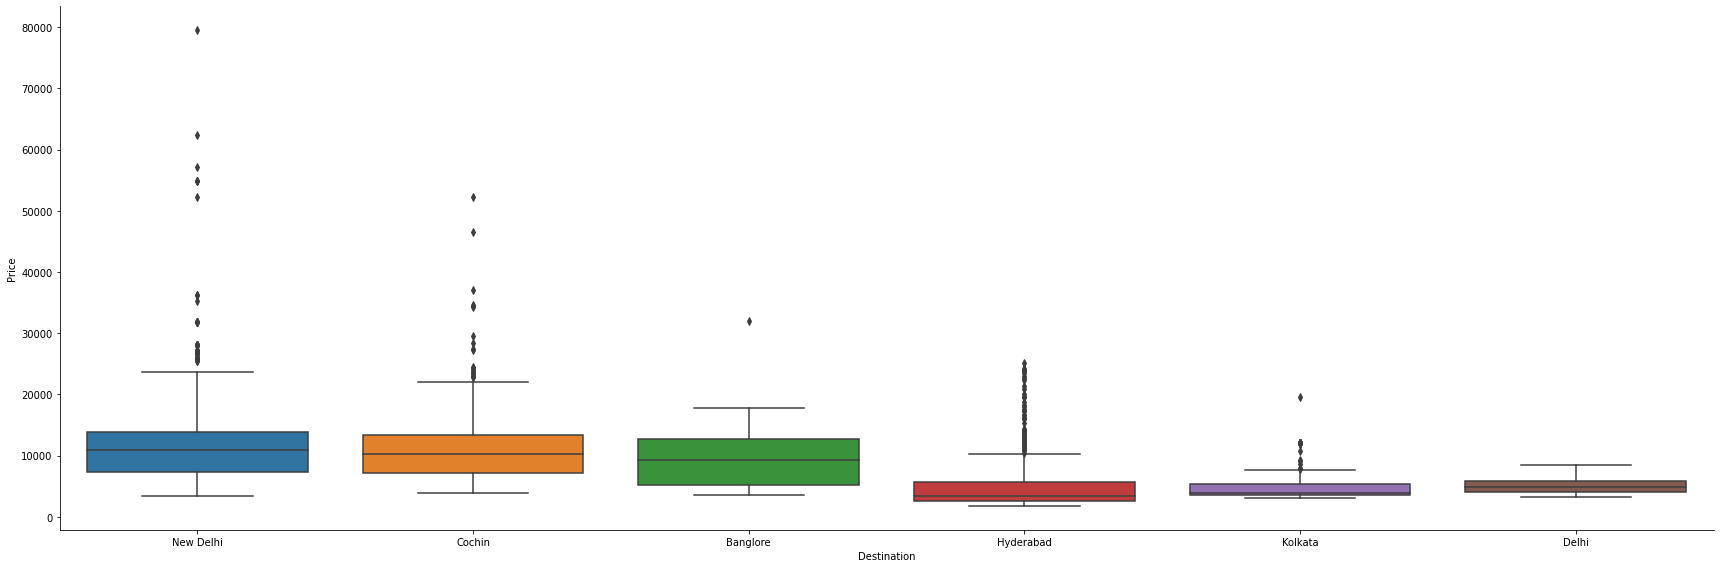

In [12]:
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="box", height = 8, aspect = 3)
plt.show()

In [13]:
train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [14]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


In [15]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1435,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,155,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,395,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,915,1 stop,No info


In [16]:
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,1,3


In [18]:
test_df["Journey_day"] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df["Journey_month"] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [19]:
test_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1435,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,155,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,395,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,915,1 stop,No info,6,3


In [20]:
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,150,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,155,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,180,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,160,non-stop,No info,12648,1,3,11,30


In [22]:
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [23]:
test_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,655,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,240,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1425,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,780,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,170,non-stop,No info,24,6,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,1435,1 stop,No info,6,6,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,155,non-stop,No info,27,3,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,395,1 stop,No info,6,3,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,915,1 stop,No info,6,3,4,0


In [24]:
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [25]:
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,11,30,14,10


In [26]:
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [27]:
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,3,4,0,19,15


In [28]:
train_df['Estimated Price'] = train_df['Price']
train_df['Airline Type'] = train_df['Airline']
train_df=train_df.drop(columns=['Airline','Price'])
train_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Estimated Price,Airline Type
0,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10,3897,IndiGo
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15,7662,Air India
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25,13882,Jet Airways
3,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30,6218,IndiGo
4,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35,13302,IndiGo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,9,4,19,55,22,25,4107,Air Asia
10679,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,4,20,45,23,20,4145,Air India
10680,Banglore,Delhi,BLR → DEL,180,non-stop,No info,27,4,8,20,11,20,7229,Jet Airways
10681,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,1,3,11,30,14,10,12648,Vistara


In [29]:
test_df['Airline Type'] = test_df['Airline']
test_df=test_df.drop(columns=['Airline'])
test_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline Type
0,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25,Jet Airways
1,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20,IndiGo
2,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0,Jet Airways
3,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0,Multiple carriers
4,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45,Air Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25,Air India
2667,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55,IndiGo
2668,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,3,21,50,4,25,Jet Airways
2669,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,3,4,0,19,15,Air India


## **Regression Training and Assesment**

## **Prediction of Airline Price using MLP Regressor with Stacked Autoencoder**

In [30]:
train_df.to_csv('Train.csv')
train_df=train_df.drop(columns=['Airline Type'])
test_df.to_csv('Test.csv')
test_df=test_df.drop(columns=['Airline Type'])

In [31]:
train_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Estimated Price
0,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10,3897
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15,7662
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25,13882
3,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30,6218
4,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,9,4,19,55,22,25,4107
10679,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,4,20,45,23,20,4145
10680,Banglore,Delhi,BLR → DEL,180,non-stop,No info,27,4,8,20,11,20,7229
10681,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,1,3,11,30,14,10,12648


In [32]:
test_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,3,21,50,4,25
2669,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,3,4,0,19,15


In [33]:
def LE(df):
  le1= LabelEncoder()
  le2= LabelEncoder()
  le3= LabelEncoder()
  le4= LabelEncoder()
  le5= LabelEncoder()
  df['Source']=le1.fit_transform(df['Source'])
  df['Destination']=le2.fit_transform(df['Destination'])
  df['Route']=le3.fit_transform(df['Route'])
  df['Total_Stops']=le4.fit_transform(df['Total_Stops'])
  df['Additional_Info']=le5.fit_transform(df['Additional_Info'])
  return df

In [34]:
train_df=LE(train_df)

In [35]:
train_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Estimated Price
0,0,5,18,170,4,8,24,3,22,20,1,10,3897
1,3,0,84,445,1,8,1,5,5,50,13,15,7662
2,2,1,118,1140,1,8,9,6,9,25,4,25,13882
3,3,0,91,325,0,8,12,5,18,5,23,30,6218
4,0,5,29,285,0,8,1,3,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,0,64,150,4,8,9,4,19,55,22,25,4107
10679,3,0,64,155,4,8,27,4,20,45,23,20,4145
10680,0,2,18,180,4,8,27,4,8,20,11,20,7229
10681,0,5,18,160,4,8,1,3,11,30,14,10,12648


In [36]:
test_df=LE(test_df)

In [37]:
test_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2,1,76,655,0,5,6,6,17,30,4,25
1,3,0,65,240,0,5,12,5,6,20,10,20
2,2,1,76,1425,0,3,21,5,19,15,19,0
3,2,1,76,780,0,5,21,5,8,0,21,0
4,0,2,16,170,4,5,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,3,0,51,1435,0,5,6,6,20,30,20,25
2667,3,0,43,155,4,5,27,3,14,20,16,55
2668,2,1,76,395,0,5,6,3,21,50,4,25
2669,2,1,76,915,0,5,6,3,4,0,19,15


In [38]:
X=train_df.iloc[:,:-1].values
y=train_df.iloc[:,-1].values

In [39]:
X

array([[  0,   5,  18, ...,  20,   1,  10],
       [  3,   0,  84, ...,  50,  13,  15],
       [  2,   1, 118, ...,  25,   4,  25],
       ...,
       [  0,   2,  18, ...,  20,  11,  20],
       [  0,   5,  18, ...,  30,  14,  10],
       [  2,   1, 108, ...,  55,  19,  15]])

In [40]:
y=y.reshape(len(y),1)

In [41]:
y

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]])

In [42]:
sc = StandardScaler()
y=sc.fit_transform(y)
y

array([[-1.12553455],
       [-0.30906781],
       [ 1.03978296],
       ...,
       [-0.40296691],
       [ 0.77218138],
       [ 0.57809433]])

In [43]:
X.shape

(10682, 12)

In [44]:
y.shape

(10682, 1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 ,random_state = 1)

In [46]:
X_val=test_df.iloc[:,:].values

### **Feature Engineering using Stacked Autoencoder**

In [47]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import pickle

In [ ]:
def Mod1(X_train, X_test, y_train, y_test,n_inputs):
    learning_rate = 1e-5
    input_shape=Input(shape=(n_inputs,))
    # Encoding layers
    e1 = layers.Dense(n_inputs, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(input_shape)
    e2 = layers.Dense(10, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e1)
    e3 = layers.Dense(8, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e2)
    e4 = layers.Dense(6, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e3)
    e5 = layers.Dense(4, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e4)
    #Decoding layers
    d1 = layers.Dense(4, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e3)
    d2 = layers.Dense(6, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d1)
    d3 = layers.Dense(8, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d2)
    d4 = layers.Dense(10, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d3)
    d5 = layers.Dense(n_inputs, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d4)
    # output layer
    output = layers.Dense(n_inputs, activation='linear',activity_regularizer=regularizers.l1(learning_rate))(d5)
    autoencoder = Model(inputs=input_shape, outputs=output)
    autoencoder.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history=autoencoder.fit(X_train, X_train,epochs=2500,batch_size=2500,shuffle=True,validation_data=(X_test,X_test))
    plt.plot(history.history['accuracy'], label='Encoder-1:train')
    plt.plot(history.history['val_accuracy'], label='Encoder-1:test')
    plt.title("Autoencoder-1 Results")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE1-4.png")
    autoencoder_1_input = autoencoder.predict(X_train)
    autoencoder_1_input = np.concatenate((autoencoder_1_input , X_train))
    autoencoder_1 = Model(inputs=input_shape, outputs=output)
    autoencoder_1.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history1=autoencoder_1.fit(autoencoder_1_input,autoencoder_1_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_1_input,autoencoder_1_input))
    plt.plot(history1.history['accuracy'], label='Encoder-2:train')
    plt.plot(history1.history['val_accuracy'], label='Encoder-2:test')
    plt.title("Autoencoder-2 Results")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE2-4.png")
    autoencoder_2_input = autoencoder_1.predict(autoencoder_1_input)
    autoencoder_2_input = np.concatenate((autoencoder_2_input, autoencoder_1_input))
    autoencoder_2 = Model(inputs=input_shape, outputs=output)
    autoencoder_2.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history2=autoencoder_2.fit(autoencoder_2_input,autoencoder_2_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_2_input,autoencoder_2_input))
    plt.plot(history2.history['accuracy'], label='Encoder-3:train')
    plt.plot(history2.history['val_accuracy'], label='Encoder-3:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE3-4.png")
    autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
    autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))
    autoencoder_3 = Model(inputs=input_shape, outputs=output)
    autoencoder_3.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history3=autoencoder_3.fit(autoencoder_3_input,autoencoder_3_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_3_input,autoencoder_3_input))
    plt.plot(history3.history['accuracy'], label='Encoder-4:train')
    plt.plot(history3.history['val_accuracy'], label='Encoder-4:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE4-4.png")
    autoencoder_4_input = autoencoder_3.predict(autoencoder_3_input)
    autoencoder_4_input = np.concatenate((autoencoder_4_input, autoencoder_3_input))
    autoencoder_4 = Model(inputs=input_shape, outputs=output)
    autoencoder_4.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history4=autoencoder_4.fit(autoencoder_4_input,autoencoder_4_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_4_input,autoencoder_4_input))
    plt.plot(history4.history['accuracy'], label='Encoder-5:train')
    plt.plot(history4.history['val_accuracy'], label='Encoder-5:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE5-5.png")
    autoencoder_5_input = autoencoder_4.predict(autoencoder_4_input)
    autoencoder_5_input = np.concatenate((autoencoder_5_input, autoencoder_4_input))
    autoencoder_5 = Model(inputs=input_shape, outputs=output)
    autoencoder_5.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history5=autoencoder_5.fit(autoencoder_5_input,autoencoder_5_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_5_input,autoencoder_5_input))
    plt.plot(history5.history['accuracy'], label='Encoder-6:train')
    plt.plot(history5.history['val_accuracy'], label='Encoder-6:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE5-6.png")
    autoencoder_6_input = autoencoder_5.predict(autoencoder_5_input)
    autoencoder_6_input = np.concatenate((autoencoder_6_input, autoencoder_5_input))
    autoencoder_6 = Model(inputs=input_shape, outputs=output)
    autoencoder_6.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history6=autoencoder_5.fit(autoencoder_6_input,autoencoder_6_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_6_input,autoencoder_6_input))
    plt.plot(history6.history['accuracy'], label='Encoder-7:train')
    plt.plot(history6.history['val_accuracy'], label='Encoder-7:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE5-7.png")
    encoder = Model(inputs=input_shape, outputs=e3)
    encoder.save('STAE1-4-encoder.h5')

Streaming output truncated to the last 5000 lines.
206/206 [==============================] - 2s 11ms/step - loss: 0.6695 - accuracy: 1.0000 - val_loss: 0.6817 - val_accuracy: 1.0000
Epoch 2/2500
206/206 [==============================] - 2s 11ms/step - loss: 0.6319 - accuracy: 1.0000 - val_loss: 0.6383 - val_accuracy: 1.0000
Epoch 3/2500
206/206 [==============================] - 2s 11ms/step - loss: 0.6598 - accuracy: 1.0000 - val_loss: 0.6472 - val_accuracy: 1.0000
Epoch 4/2500
206/206 [==============================] - 2s 11ms/step - loss: 0.6482 - accuracy: 1.0000 - val_loss: 0.6248 - val_accuracy: 1.0000
Epoch 5/2500
206/206 [==============================] - 2s 12ms/step - loss: 0.6622 - accuracy: 1.0000 - val_loss: 0.6200 - val_accuracy: 1.0000
Epoch 6/2500
206/206 [==============================] - 2s 11ms/step - loss: 0.6501 - accuracy: 1.0000 - val_loss: 0.6133 - val_accuracy: 1.0000
Epoch 7/2500
206/206 [==============================] - 2s 11ms/step - loss: 0.6677 - accura

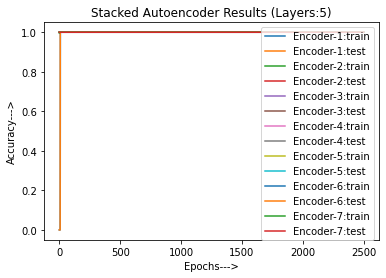

In [ ]:
n_inputs=12
Mod1(X_train, X_test, y_train, y_test,n_inputs)

### **Passive Aggressive Regressor Model**

In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
model =  PassiveAggressiveRegressor(max_iter=100)
encoder = load_model('STAE1-4-encoder.h5')
print('Train', X_train.shape, y_train.shape, 'Test', X_test.shape, y_test.shape)
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)
X_val_encode = encoder.predict(X_val)
print(X_train_encode.shape)
print(X_test_encode.shape)
model.fit(X_train_encode,y_train)
filename = 'PAR.h5'
pickle.dump(model, open(filename, 'wb'))
print("Model saved succesfully!!!")
loaded_model = pickle.load(open(filename, 'rb'))
print("Loaded Model Sucessfully")
yhat = loaded_model.predict(X_test_encode)
print('Regression  Model Training Score: %.3f' % (r2_score(y_test, yhat)))

Train (8011, 12) (8011, 1) Test (2671, 12) (2671, 1)
(8011, 8)
(2671, 8)
Model saved succesfully!!!
Loaded Model Sucessfully
Regression  Model Training Score: -7.371


In [48]:
encoder = load_model('STAE1-4-encoder.h5')
filename = 'PAR.h5'
X_val_encode = encoder.predict(X_val)

In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
print("Loaded Model Sucessfully")
yhat1 = loaded_model.predict(X_val_encode)

Loaded Model Sucessfully


## **Model Validation**

In [50]:
sam=pd.read_excel('Sample_submission.xlsx')
y_val = sam.iloc[:,:].values

In [51]:
y_val

array([[15998],
       [16612],
       [25572],
       ...,
       [22720],
       [23544],
       [27489]])

In [52]:
yhat1=sc.inverse_transform(yhat1.reshape(len(yhat1),1))
yhat1

array([[19867.51331457],
       [11698.64979108],
       [32604.79477069],
       ...,
       [15477.12123052],
       [24092.42496119],
       [24079.83566476]])

### **Model Metrics**

In [53]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance

In [54]:
print('\n Explained Variance score:',explained_variance_score(y_val, yhat1))
print('\n Max Score:',max_error(y_val, yhat1))
print('\n Mean absolute error Score:',mean_absolute_error(y_val, yhat1))
print('\n Mean Squared log Error Score:',mean_squared_log_error(y_val, yhat1))
print('\n Median absolute Score:',median_absolute_error(y_val, yhat1))
print('\n Mean absolute Percentage Error Score:',mean_absolute_percentage_error(y_val, yhat1))
print('\n R2 Score:',r2_score(y_val, yhat1))



 Explained Variance score: -3.711919397853385

 Max Score: 41981.75965752338

 Mean absolute error Score: 8905.253690627753

 Mean Squared log Error Score: 0.341349451312468

 Median absolute Score: 7883.385911993417

 Mean absolute Percentage Error Score: 0.45387153248081674

 R2 Score: -3.7556634975667507


## **Classification Training and Assesment**

## **Prediction of Airline Type using MLP Classifier with Stacked Autoencoder**

**Note: To predict Airline Type , we first require the airline price based on which we predict/validate the same.Hence this model is termed as a Cascaded Model / Pipeline Model**

In [55]:
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [56]:
train_df['Airline']= train_df['Airline Type']
train_df=train_df.drop(columns=['Unnamed: 0','Airline Type'])
train_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Estimated Price,Airline
0,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,24,3,22,20,1,10,3897,IndiGo
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,1,5,5,50,13,15,7662,Air India
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,9,6,9,25,4,25,13882,Jet Airways
3,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,12,5,18,5,23,30,6218,IndiGo
4,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,1,3,16,50,21,35,13302,IndiGo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,9,4,19,55,22,25,4107,Air Asia
10678,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,4,20,45,23,20,4145,Air India
10679,Banglore,Delhi,BLR → DEL,180,non-stop,No info,27,4,8,20,11,20,7229,Jet Airways
10680,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,1,3,11,30,14,10,12648,Vistara


In [57]:
test_df['Price'] = np.round(yhat1). astype(int)
test_df['Airline']= test_df['Airline Type']
test_df = test_df.drop(columns=['Unnamed: 0','Airline Type'])
test_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price,Airline
0,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25,19868,Jet Airways
1,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20,11699,IndiGo
2,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0,32605,Jet Airways
3,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0,20370,Multiple carriers
4,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45,7754,Air Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25,34122,Air India
2667,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55,9853,IndiGo
2668,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,6,3,21,50,4,25,15477,Jet Airways
2669,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,6,3,4,0,19,15,24092,Air India


In [58]:
def LE1(df):
  le1= LabelEncoder()
  le2= LabelEncoder()
  le3= LabelEncoder()
  le4= LabelEncoder()
  le5= LabelEncoder()
  le6 =LabelEncoder()
  df['Source']=le1.fit_transform(df['Source'])
  df['Destination']=le2.fit_transform(df['Destination'])
  df['Route']=le3.fit_transform(df['Route'])
  df['Total_Stops']=le4.fit_transform(df['Total_Stops'])
  df['Additional_Info']=le5.fit_transform(df['Additional_Info'])
  df['Airline']= le6.fit_transform(df['Airline'])
  return df

In [59]:
train_df= LE1(train_df)

In [60]:
train_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Estimated Price,Airline
0,0,5,18,170,4,8,24,3,22,20,1,10,3897,3
1,3,0,84,445,1,8,1,5,5,50,13,15,7662,1
2,2,1,118,1140,1,8,9,6,9,25,4,25,13882,4
3,3,0,91,325,0,8,12,5,18,5,23,30,6218,3
4,0,5,29,285,0,8,1,3,16,50,21,35,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,3,0,64,150,4,8,9,4,19,55,22,25,4107,0
10678,3,0,64,155,4,8,27,4,20,45,23,20,4145,1
10679,0,2,18,180,4,8,27,4,8,20,11,20,7229,4
10680,0,5,18,160,4,8,1,3,11,30,14,10,12648,10


In [61]:
test_df=LE1(test_df)

In [62]:
test_df

,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price,Airline
0,2,1,76,655,0,5,6,6,17,30,4,25,19868,4
1,3,0,65,240,0,5,12,5,6,20,10,20,11699,3
2,2,1,76,1425,0,3,21,5,19,15,19,0,32605,4
3,2,1,76,780,0,5,21,5,8,0,21,0,20370,6
4,0,2,16,170,4,5,24,6,23,55,2,45,7754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,3,0,51,1435,0,5,6,6,20,30,20,25,34122,1
2667,3,0,43,155,4,5,27,3,14,20,16,55,9853,3
2668,2,1,76,395,0,5,6,3,21,50,4,25,15477,4
2669,2,1,76,915,0,5,6,3,4,0,19,15,24092,1


In [63]:
X=train_df.iloc[:,:-1].values
y=train_df.iloc[:,-1].values
X_val=test_df.iloc[:,:-1].values
y_val=test_df.iloc[:,-1].values

In [64]:
X

array([[    0,     5,    18, ...,     1,    10,  3897],
       [    3,     0,    84, ...,    13,    15,  7662],
       [    2,     1,   118, ...,     4,    25, 13882],
       ...,
       [    0,     2,    18, ...,    11,    20,  7229],
       [    0,     5,    18, ...,    14,    10, 12648],
       [    2,     1,   108, ...,    19,    15, 11753]])

In [65]:
y=y.reshape(len(y),1)

In [66]:
y

array([[ 3],
       [ 1],
       [ 4],
       ...,
       [ 4],
       [10],
       [ 1]])

In [67]:
X[:,12:13]

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]])

In [68]:
sc = StandardScaler()
X[:,12:13]=sc.fit_transform(X[:,12:13])
X

array([[  0,   5,  18, ...,   1,  10,  -1],
       [  3,   0,  84, ...,  13,  15,   0],
       [  2,   1, 118, ...,   4,  25,   1],
       ...,
       [  0,   2,  18, ...,  11,  20,   0],
       [  0,   5,  18, ...,  14,  10,   0],
       [  2,   1, 108, ...,  19,  15,   0]])

In [69]:
X.shape

(10682, 13)

In [70]:
y.shape

(10682, 1)

In [71]:
X_val

array([[    2,     1,    76, ...,     4,    25, 19868],
       [    3,     0,    65, ...,    10,    20, 11699],
       [    2,     1,    76, ...,    19,     0, 32605],
       ...,
       [    2,     1,    76, ...,     4,    25, 15477],
       [    2,     1,    76, ...,    19,    15, 24092],
       [    2,     1,    76, ...,    19,    15, 24080]])

In [72]:
y_val=y_val.reshape(len(y_val),1)

In [73]:
y_val

array([[4],
       [3],
       [4],
       ...,
       [4],
       [1],
       [6]])

In [74]:
X_val[:,12:13]

array([[19868],
       [11699],
       [32605],
       ...,
       [15477],
       [24092],
       [24080]])

In [75]:
sc = StandardScaler()
X_val[:,12:13]=sc.fit_transform(X_val[:,12:13])
X_val

array([[ 2,  1, 76, ...,  4, 25,  0],
       [ 3,  0, 65, ..., 10, 20,  0],
       [ 2,  1, 76, ..., 19,  0,  1],
       ...,
       [ 2,  1, 76, ...,  4, 25,  0],
       [ 2,  1, 76, ..., 19, 15,  0],
       [ 2,  1, 76, ..., 19, 15,  0]])

In [76]:
X_val.shape

(2671, 13)

In [77]:
y_val.shape

(2671, 1)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 ,random_state = 1)

### **Feature Engineering Using Stacked Autoencoder**

In [ ]:
def Mod(X_train, X_test, y_train, y_test,n_inputs):
    learning_rate = 1e-5
    input_shape=Input(shape=(n_inputs,))
    # Encoding layers
    e1 = layers.Dense(n_inputs, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(input_shape)
    e2 = layers.Dense(9, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e1)
    e3 = layers.Dense(7, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e2)
    e4 = layers.Dense(5, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e3)
    e5 = layers.Dense(3, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e4)
    #Decoding layers
    d1 = layers.Dense(3, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(e3)
    d2 = layers.Dense(5, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d1)
    d3 = layers.Dense(7, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d2)
    d4 = layers.Dense(9, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d3)
    d5 = layers.Dense(n_inputs, activation='relu',activity_regularizer=regularizers.l1(learning_rate))(d4)
    # output layer
    output = layers.Dense(n_inputs, activation='linear',activity_regularizer=regularizers.l1(learning_rate))(d5)
    autoencoder = Model(inputs=input_shape, outputs=output)
    autoencoder.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history=autoencoder.fit(X_train, X_train,epochs=2500,batch_size=2500,shuffle=True,validation_data=(X_test,X_test))
    plt.plot(history.history['accuracy'], label='Encoder-1:train')
    plt.plot(history.history['val_accuracy'], label='Encoder-1:test')
    plt.title("Autoencoder-1 Results")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE1-41.png")
    autoencoder_1_input = autoencoder.predict(X_train)
    autoencoder_1_input = np.concatenate((autoencoder_1_input , X_train))
    autoencoder_1 = Model(inputs=input_shape, outputs=output)
    autoencoder_1.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history1=autoencoder_1.fit(autoencoder_1_input,autoencoder_1_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_1_input,autoencoder_1_input))
    plt.plot(history1.history['accuracy'], label='Encoder-2:train')
    plt.plot(history1.history['val_accuracy'], label='Encoder-2:test')
    plt.title("Autoencoder-2 Results")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE2-42.png")
    autoencoder_2_input = autoencoder_1.predict(autoencoder_1_input)
    autoencoder_2_input = np.concatenate((autoencoder_2_input, autoencoder_1_input))
    autoencoder_2 = Model(inputs=input_shape, outputs=output)
    autoencoder_2.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history2=autoencoder_2.fit(autoencoder_2_input,autoencoder_2_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_2_input,autoencoder_2_input))
    plt.plot(history2.history['accuracy'], label='Encoder-3:train')
    plt.plot(history2.history['val_accuracy'], label='Encoder-3:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE3-43.png")
    autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
    autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))
    autoencoder_3 = Model(inputs=input_shape, outputs=output)
    autoencoder_3.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history3=autoencoder_3.fit(autoencoder_3_input,autoencoder_3_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_3_input,autoencoder_3_input))
    plt.plot(history3.history['accuracy'], label='Encoder-4:train')
    plt.plot(history3.history['val_accuracy'], label='Encoder-4:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE4-44.png")
    autoencoder_4_input = autoencoder_3.predict(autoencoder_3_input)
    autoencoder_4_input = np.concatenate((autoencoder_4_input, autoencoder_3_input))
    autoencoder_4 = Model(inputs=input_shape, outputs=output)
    autoencoder_4.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history4=autoencoder_4.fit(autoencoder_4_input,autoencoder_4_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_4_input,autoencoder_4_input))
    plt.plot(history4.history['accuracy'], label='Encoder-5:train')
    plt.plot(history4.history['val_accuracy'], label='Encoder-5:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE5-45.png")
    autoencoder_5_input = autoencoder_4.predict(autoencoder_4_input)
    autoencoder_5_input = np.concatenate((autoencoder_5_input, autoencoder_4_input))
    autoencoder_5 = Model(inputs=input_shape, outputs=output)
    autoencoder_5.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history5=autoencoder_5.fit(autoencoder_5_input,autoencoder_5_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_5_input,autoencoder_5_input))
    plt.plot(history5.history['accuracy'], label='Encoder-6:train')
    plt.plot(history5.history['val_accuracy'], label='Encoder-6:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE5-46.png")
    autoencoder_6_input = autoencoder_5.predict(autoencoder_5_input)
    autoencoder_6_input = np.concatenate((autoencoder_6_input, autoencoder_5_input))
    autoencoder_6 = Model(inputs=input_shape, outputs=output)
    autoencoder_6.compile(metrics=['accuracy'],optimizer='adam', loss='mse')
    history6=autoencoder_5.fit(autoencoder_6_input,autoencoder_6_input,epochs=2500,batch_size=2500,shuffle=True,validation_data=(autoencoder_6_input,autoencoder_6_input))
    plt.plot(history6.history['accuracy'], label='Encoder-7:train')
    plt.plot(history6.history['val_accuracy'], label='Encoder-7:test')
    plt.title("Stacked Autoencoder Results (Layers:5)")
    plt.ylabel("Accuracy--->")
    plt.xlabel("Epochs--->")
    plt.legend()
    plt.savefig("STAE5-47.png")
    encoder = Model(inputs=input_shape, outputs=e3)
    encoder.save('STAE2-4-encoder.h5')

Streaming output truncated to the last 5000 lines.
206/206 [==============================] - 2s 12ms/step - loss: 1.9151 - accuracy: 1.0000 - val_loss: 1.8998 - val_accuracy: 1.0000
Epoch 2/2500
206/206 [==============================] - 3s 12ms/step - loss: 1.9153 - accuracy: 1.0000 - val_loss: 1.8920 - val_accuracy: 1.0000
Epoch 3/2500
206/206 [==============================] - 2s 12ms/step - loss: 1.9247 - accuracy: 1.0000 - val_loss: 1.9099 - val_accuracy: 1.0000
Epoch 4/2500
206/206 [==============================] - 2s 11ms/step - loss: 1.9305 - accuracy: 1.0000 - val_loss: 1.9207 - val_accuracy: 1.0000
Epoch 5/2500
206/206 [==============================] - 2s 12ms/step - loss: 1.9127 - accuracy: 1.0000 - val_loss: 1.9155 - val_accuracy: 1.0000
Epoch 6/2500
206/206 [==============================] - 2s 12ms/step - loss: 1.9230 - accuracy: 1.0000 - val_loss: 1.8930 - val_accuracy: 1.0000
Epoch 7/2500
206/206 [==============================] - 2s 11ms/step - loss: 1.9403 - accura

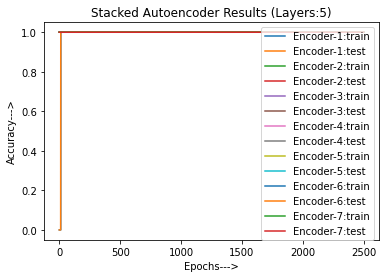

In [ ]:
n_inputs=13
Mod(X_train,X_test,y_train,y_test,n_inputs)

### **Super Learner Classifier Model**

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import load_model
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import StackingClassifier
import pickle

In [80]:
models = list()
meta = RandomForestClassifier()
models.append(('LogR',LogisticRegression(solver='liblinear')))
# models.append(('KNN',KNeighborsClassifier()))
models.append(('PC',Perceptron()))
models.append(('RIC',RidgeClassifier()))
models.append(('PAC',PassiveAggressiveClassifier()))
models.append(('BC',BaggingClassifier(meta,n_estimators=150)))
models.append(('RC',RandomForestClassifier(n_estimators=150)))
models.append(('EXTC',ExtraTreesClassifier(n_estimators=150)))
models.append(('XGBC',XGBClassifier()))
models.append(('MLPC',MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=250)))

In [81]:
# meta model
meta = XGBClassifier()

In [ ]:
model =  StackingClassifier(estimators=models, final_estimator=meta, cv=25)
encoder = load_model('STAE2-4-encoder.h5')
print('Train', X_train.shape, y_train.shape, 'Test', X_test.shape, y_test.shape)
X_train_encode = encoder.predict(X_train)
print(X_train_encode.shape)
print(X_test_encode.shape)
model.fit(X_train_encode,y_train)
filename = 'SLMC.h5'
pickle.dump(model, open(filename, 'wb'))
print("Model saved succesfully!!!")

Train (8011, 13) (8011, 1) Test (2671, 13) (2671, 1)
(8011, 7)
(2671, 7)
Model saved succesfully!!!


In [82]:
filename = 'SLMC.h5'
encoder = load_model('STAE2-4-encoder.h5')
X_test_encode = encoder.predict(X_test)
X_val_encode = encoder.predict(X_val)

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
print("Loaded Model Sucessfully")

In [89]:
yhat = loaded_model.predict(X_test_encode)
print('Classifier Learner: %.3f' % (accuracy_score(y_test, yhat) * 100))

Classifier Learner: 94.908


In [83]:
loaded_model = pickle.load(open(filename, 'rb'))
print("Loaded Model Sucessfully")
yhat1 = loaded_model.predict(X_val_encode)

Loaded Model Sucessfully


In [84]:
y_val

array([[4],
       [3],
       [4],
       ...,
       [4],
       [1],
       [6]])

In [85]:
yhat1

array([ 4,  1,  4, ...,  6, 10,  4])

### **Model Metrics**

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [93]:
print("\n Score Metrics:")
print('\n Accuracy score:', round(accuracy_score(y_test, yhat) * 100))
print('\n Balanced Accuracy score' ,round(balanced_accuracy_score(y_test, yhat) * 100))
print('\n Cohen Kappa score' ,round(cohen_kappa_score(y_test, yhat) * 100))
print('\n F1 Score (Macro):' ,round(f1_score(y_test, yhat,average='macro') * 100))
print('\n F1 Score (Micro):' ,round(f1_score(y_test, yhat,average='micro') * 100))
print('\n F1 Score (Weighted):' ,round(f1_score(y_test, yhat,average='weighted') * 100))
print('\n Jaccard Score (Macro):' ,round(jaccard_score(y_test, yhat,average='macro') * 100))
print('\n Jaccard Score (Micro):' ,round(jaccard_score(y_test, yhat,average='micro') * 100))
print('\n Jaccard Score (Weighted):' ,round(jaccard_score(y_test, yhat,average='weighted') * 100))
print("\n Loss Metrics:")
print('\n Hamming Loss :' ,hamming_loss(y_test, yhat))
print("\n Confusion matrix")
print('\n')
print(confusion_matrix(y_test,yhat))
print('\n')


 Score Metrics:

 Accuracy score: 95

 Balanced Accuracy score 75

 Cohen Kappa score 93

 F1 Score (Macro): 76

 F1 Score (Micro): 95

 F1 Score (Weighted): 95

 Jaccard Score (Macro): 73

 Jaccard Score (Micro): 90

 Jaccard Score (Weighted): 90

 Loss Metrics:

 Hamming Loss : 0.05091725945338824

 Confusion matrix


[[ 89   0   0   1   0   0   0   0   0   0]
 [  0 401   0   3  31   0   1   0   2   1]
 [  0   0  39   1   1   0   1   0   0   0]
 [  1   3   0 459   3   0  10   0   3   1]
 [  0   7   0   7 977   0   4   0   1   2]
 [  0   0   0   0   1   0   0   0   0   0]
 [  0  11   0   8  10   0 274   0   0   0]
 [  0   0   0   0   0   0   3   0   0   0]
 [  0   0   0   4   4   0   0   0 193   0]
 [  0   1   0   0   9   0   1   0   0 103]]


